In [1]:
import os
import pandas
import glob
from nltk import tokenize

In [2]:
datadir = '/g/ssli/data/scotus/processed/oyez-youtube/splitByCaseSpeakerRole.raw'

In [18]:
max_sentence_len = 45
filenames = glob.glob(os.path.join(datadir, '*'))
rows = []
for filename in filenames:
    basename = os.path.basename(filename)
    fields = basename.split('__')
    if len(fields) > 3:
        case, firstname, lastname, role = fields
        person = firstname + lastname
    else:
        case, person, role = fields
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            sentences = tokenize.sent_tokenize(line)
            for sentence in sentences:
                words = tokenize.word_tokenize(sentence.lower())
                while len(words) > max_sentence_len:
                    rows.append({'case': case, 'role': role, 'person': person, 
                                 'text': ' '.join(words[:max_sentence_len])})
                    words = words[max_sentence_len:]
                if len(words) > 0:
                    rows.append({'case': case, 'role': role, 'person': person, 
                                 'text': ' '.join(words)})

In [19]:
df = pandas.DataFrame(rows)

In [21]:
df.head()

,case,person,role,text
0,1990_106_orig,rickie_l_pearson,advocate,"mr. chief justice , and may it please the court :"
1,1990_106_orig,rickie_l_pearson,advocate,in 1986 illinois filed a complaint against the...
2,1990_106_orig,rickie_l_pearson,advocate,in the complaint illinois alleged that kentuck...
3,1990_106_orig,rickie_l_pearson,advocate,prior to this litigation the 1792 low-water ma...
4,1990_106_orig,rickie_l_pearson,advocate,and prior to that action there had never been ...


In [22]:
df['lengths'] = df.text.apply(lambda x: len(x.split()))

In [23]:
len(df)

1081155

In [24]:
df.case.unique().shape

(1765,)

In [25]:
df.sort_values('lengths', ascending=False)

,case,person,role,text,lengths
746606,2004_04_480,donald_b_verrilli_jr,advocate,"now , even if there are commercially significa...",45
850965,2006_06_562,stephen_g_breyer,justice,i 'm not so sure because ... unless you want t...,45
1039967,2011_09_958,sonia_sotomayor,justice,issuing an injunction that gives the matter ov...,45
850996,2006_06_562,thomas_g_hungar,advocate,respondent essentially asks this court to crea...,45
67106,1991_90_1014,sandra_a_blanding,advocate,"i think that public school education , as this...",45
850994,2006_06_562,thomas_g_hungar,advocate,respondent 's theory should be rejected becaus...,45
375880,1997_96_1370,default,other,in an amicus brief it said there are 23 states...,45
1039973,2011_09_958,sonia_sotomayor,justice,-- but you engaged the question that -- the ap...,45
122354,1991_91_971,kimball_j_corson,advocate,the primary issue is you must show that you ha...,45
259879,1994_94_372,irving_l_gornstein,advocate,", and sometimes the term microcephaly is used ...",45


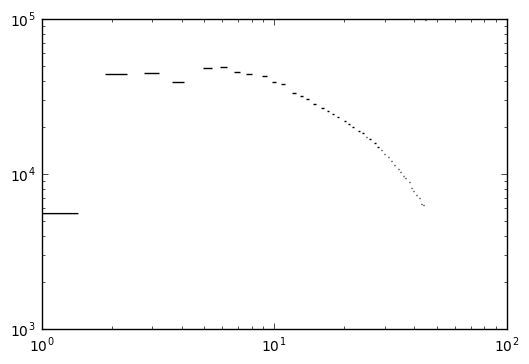

In [26]:
from matplotlib import pyplot
pyplot.hist(df.lengths, bins=100)
pyplot.semilogx()
pyplot.semilogy()
pyplot.show()

In [27]:
import numpy as np
np.percentile(df.lengths, )

TypeError: percentile() takes at least 2 arguments (1 given)

In [28]:
del df['lengths']

In [39]:
df = df.sample(frac=1)
df.to_csv('scotusbig.tsv.gz', compression='gzip', sep='\t', header=None, index=False)

In [38]:
import collections
c = collections.Counter(df.role)
c

Counter({'advocate': 627452,
         'justice': 288532,
         'other': 146515,
         'unidentified': 18405,
         'unknown': 251})